PROBLEM-1

In this task, the goal is to perform several operations on the image tf2_engineer.jpg using OpenCV and Matplotlib.

1. Load and display the original image in color.
2. Determine the center coordinates of the image and print the intensity (RGB) value at that point.
3. Add a rectangular color patch centered on the image with dimensions 30x40 pixels. The patch color is given in hex format as #329ea8.
4. Print the intensity value at the center of the patch.
5. Display the modified image with the color patch.


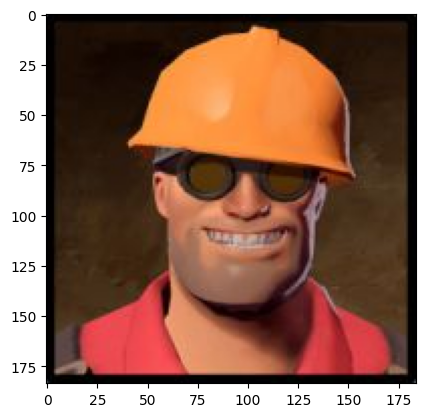

Center coordinates: (92, 92)
Intensity value at the center (R, G, B): [172  92  67]
Patch center coordinates: (92, 92)
Intensity value at the patch center (R, G, B): [ 50 158 168]


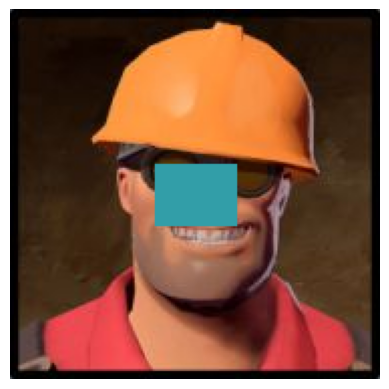

In [5]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi

image = cv2.imread('tf2_engineer.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
dale.imshow(image_rgb)
dale.show()

height, width = image_rgb.shape[:2]
center_y, center_x = height // 2, width // 2
center_intensity = image_rgb[center_y, center_x]
print(f"Center coordinates: ({center_y}, {center_x})")
print(f"Intensity value at the center (R, G, B): {center_intensity}")

patch_color = (50, 158, 168)
patch_height, patch_width = 30, 40
top_left = (center_x - patch_width // 2, center_y - patch_height // 2)
bottom_right = (center_x + patch_width // 2, center_y + patch_height // 2)
image_with_patch = image_rgb.copy()
cv2.rectangle(image_with_patch, top_left, bottom_right, patch_color, -1)

patch_center_intensity = image_with_patch[center_y, center_x]
print(f"Patch center coordinates: ({center_y}, {center_x})")
print(f"Intensity value at the patch center (R, G, B): {patch_center_intensity}")

dale.imshow(image_with_patch)
dale.axis('off')
dale.show()


I found the center of the image and added a rectangle there. After adding the patch, the color of the center pixel changed. This shows that the patch was added correctly. I can see the patch in the center of the image with the correct color.

PROBLEM-2

In this task, I work with the image einstein.tif. The steps are:

1. Load and display the original image in grayscale.
2. Create the negative version of the grayscale image.
3. Display the negative image.
4. Pick 5 random pixels from the original image and compare their intensity values with the same pixels in the negative image.

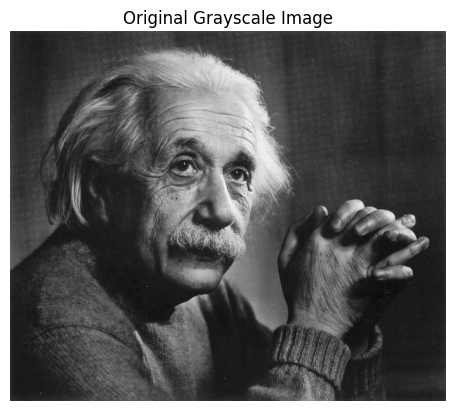

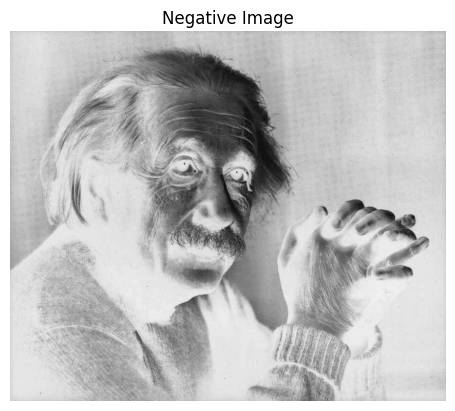

Pixel Coordinates and Intensity Values:
-------------------------------
Pixel 1 - Coordinates: (245, 119)
Original Intensity: 107
Negative Intensity: 148
-------------------------------
Pixel 2 - Coordinates: (596, 12)
Original Intensity: 98
Negative Intensity: 157
-------------------------------
Pixel 3 - Coordinates: (530, 463)
Original Intensity: 131
Negative Intensity: 124
-------------------------------
Pixel 4 - Coordinates: (180, 467)
Original Intensity: 153
Negative Intensity: 102
-------------------------------
Pixel 5 - Coordinates: (467, 33)
Original Intensity: 99
Negative Intensity: 156
-------------------------------


In [10]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi

image = cv2.imread('einstein.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error")
else:
    dale.imshow(image, cmap='gray')
    dale.title("Original Grayscale Image")
    dale.axis('off')
    dale.show()

    negative_image = 255 - image

    dale.imshow(negative_image, cmap='gray')
    dale.title("Negative Image")
    dale.axis('off')
    dale.show()

    height, width = image.shape
    random_indices = cedi.random.randint(0, min(height, width), size=(5, 2))

    print("Pixel Coordinates and Intensity Values:")
    print("-------------------------------")
    for i, (y, x) in enumerate(random_indices):
        original_value = image[y, x]
        negative_value = negative_image[y, x]
        print(f"Pixel {i+1} - Coordinates: ({y}, {x})")
        print(f"Original Intensity: {original_value}")
        print(f"Negative Intensity: {negative_value}")
        print("-------------------------------")


I converted the image to grayscale and then made a negative version. I looked at 5 random pixels. The pixel values were different in the negative image. This shows that the negative was created correctly. The dark areas became bright and the bright areas became dark.

PROBLEM-3

In this task, the image pout.tif is used to explore log and inverse log transformations.

1. Read and display the original image in grayscale.
2. Apply log transformation to enhance details in darker areas.
3. Apply inverse log transformation directly on the original image.
4. Apply inverse log transformation to the log-transformed image from step 2.
5. Compare and interpret the results of step 2 and step 4.

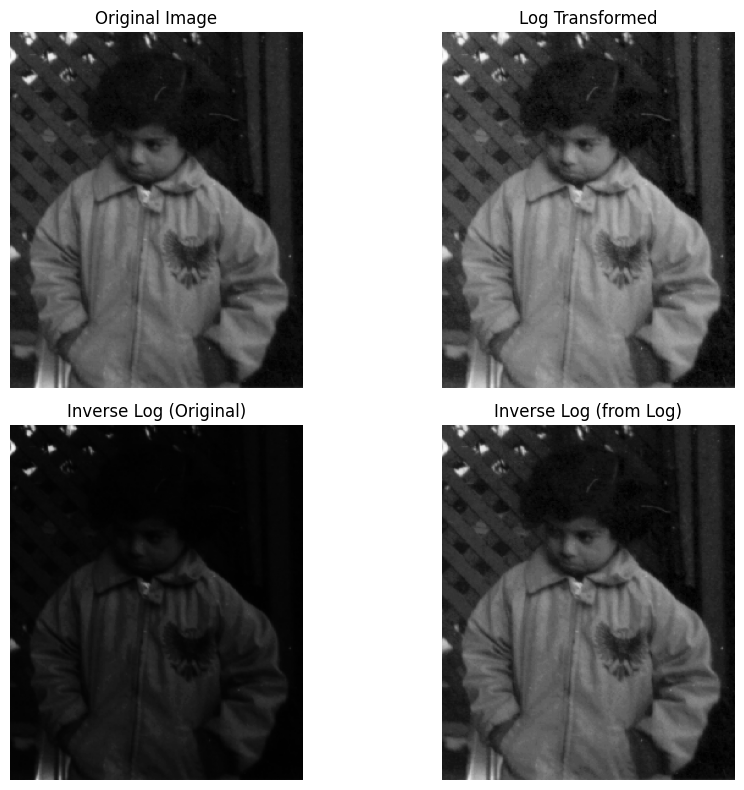

In [9]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi

image = cv2.imread('pout.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error")
else:
    c = 255 / cedi.log1p(255)
    log_image = c * cedi.log1p(image)
    log_image = cedi.uint8(log_image / log_image.max() * 255)

    inverse_log_image = cedi.expm1(image / c)
    inverse_log_image = cedi.uint8(inverse_log_image / inverse_log_image.max() * 255)

    inverse_log_from_log = cedi.expm1(log_image / c)
    inverse_log_from_log = cedi.uint8(inverse_log_from_log / inverse_log_from_log.max() * 255)

    dale.figure(figsize=(10, 8))

    dale.subplot(2, 2, 1)
    dale.imshow(image, cmap='gray')
    dale.title("Original Image")
    dale.axis('off')

    dale.subplot(2, 2, 2)
    dale.imshow(log_image, cmap='gray')
    dale.title("Log Transformed")
    dale.axis('off')

    dale.subplot(2, 2, 3)
    dale.imshow(inverse_log_image, cmap='gray')
    dale.title("Inverse Log (Original)")
    dale.axis('off')

    dale.subplot(2, 2, 4)
    dale.imshow(inverse_log_from_log, cmap='gray')
    dale.title("Inverse Log (from Log)")
    dale.axis('off')

    dale.tight_layout()
    dale.show()

I applied a logarithmic transformation to make the dark areas brighter. Then I used the inverse logarithm to try to go back. The image in step 4 looks similar to the original, but it is not exactly the same. The logarithmic transformation helps to see the small details in the dark parts of the image.

PROBLEM-4

This task uses the image moon.tif to compare unsharp masking techniques in both spatial and frequency domains.

1. Load and display the image in grayscale.
2. Apply unsharp masking in the spatial domain using three different k values.
3. Apply unsharp masking in the frequency domain using the same k values with a Butterworth high-pass filter.
4. Display the results side-by-side to compare both methods.

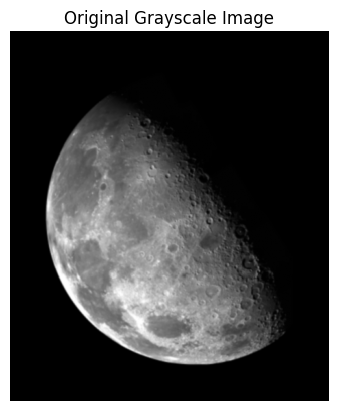

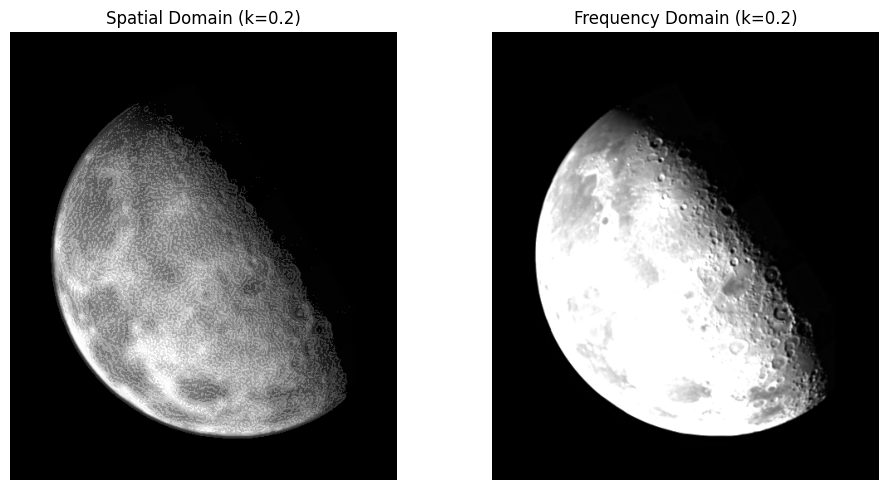

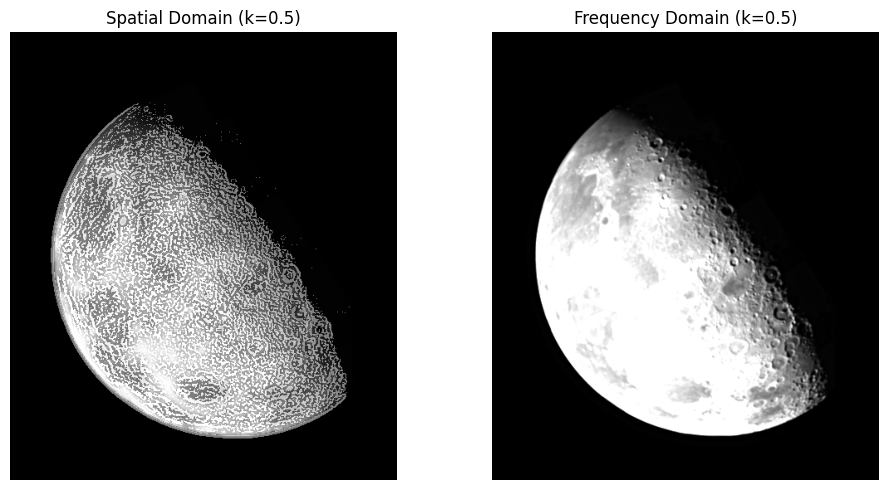

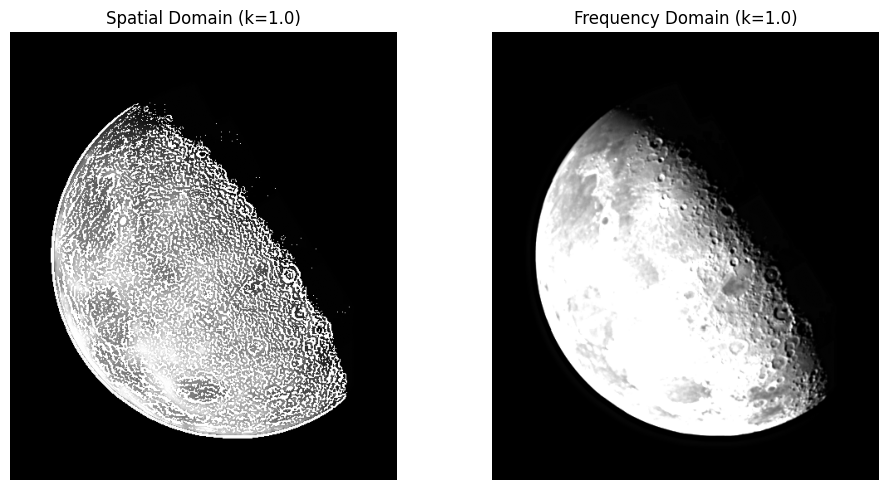

In [2]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi
from numpy.fft import fft2, ifft2, fftshift, ifftshift

image = cv2.imread('moon.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error")
else:
    dale.imshow(image, cmap='gray')
    dale.title("Original Grayscale Image")
    dale.axis('off')
    dale.show()

    k_values = [0.2, 0.5, 1.0]
    spatial_results = []

    for k in k_values:
        blurred = cv2.GaussianBlur(image, (5, 5), 1.0)
        mask = image - blurred
        sharpened = image + k * mask
        sharpened = cedi.clip(sharpened, 0, 255).astype(cedi.uint8)
        spatial_results.append(sharpened)

    frequency_results = []
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    D0 = 30

    def butterworth_highpass(i, j):
        d = cedi.sqrt((i - crow) ** 2 + (j - ccol) ** 2)
        if d == 0:
            return 0
        return 1 / (1 + (D0 / d) ** 4)

    f_image = fft2(image)
    f_shifted = fftshift(f_image)

    for k in k_values:
        H = cedi.zeros((rows, cols), dtype=cedi.float32)
        for i in range(rows):
            for j in range(cols):
                H[i, j] = butterworth_highpass(i, j)

        filtered = (1 + k * H) * f_shifted
        inverse_shift = ifft2(ifftshift(filtered)).real
        sharpened_freq = cedi.clip(image + inverse_shift, 0, 255).astype(cedi.uint8)
        frequency_results.append(sharpened_freq)

    for i, k in enumerate(k_values):
        dale.figure(figsize=(10, 5))
        dale.subplot(1, 2, 1)
        dale.imshow(spatial_results[i], cmap='gray')
        dale.title(f'Spatial Domain (k={k})')
        dale.axis('off')
        dale.subplot(1, 2, 2)
        dale.imshow(frequency_results[i], cmap='gray')
        dale.title(f'Frequency Domain (k={k})')
        dale.axis('off')
        dale.tight_layout()
        dale.show()

I used Unsharp masking in two ways: spatial and frequency domain. I tested three values ​​of k. Both methods made the image sharper. The results look similar, but the frequency method gave sharper edges. I find the frequency domain to be better when I want sharper details.

PROBLEM-5

In this task, I work with the image pcb.tif to identify and reduce noise.

1. Load and display the original image in grayscale.
2. Analyze the noise type using histogram and statistical measures.
3. Apply filtering techniques to reduce the noise based on its type.

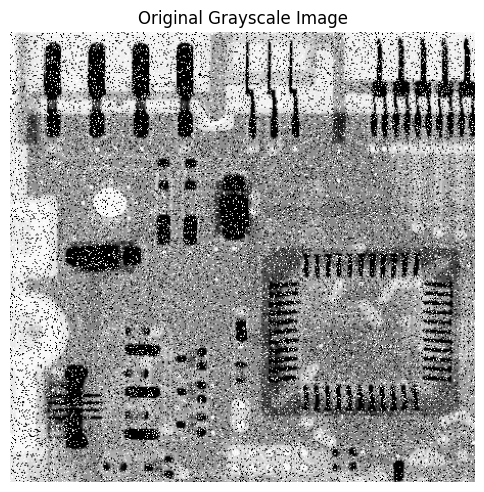

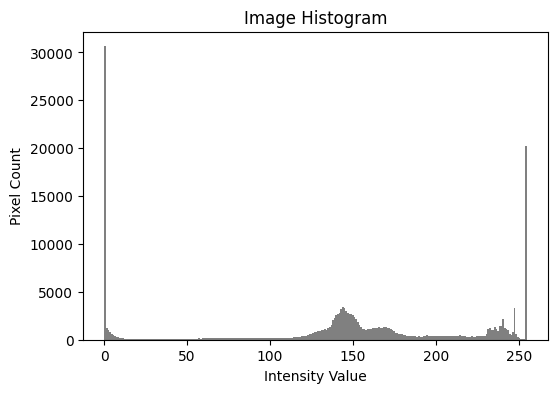

Image Mean Value: 144.06
Image Standard Deviation: 82.96


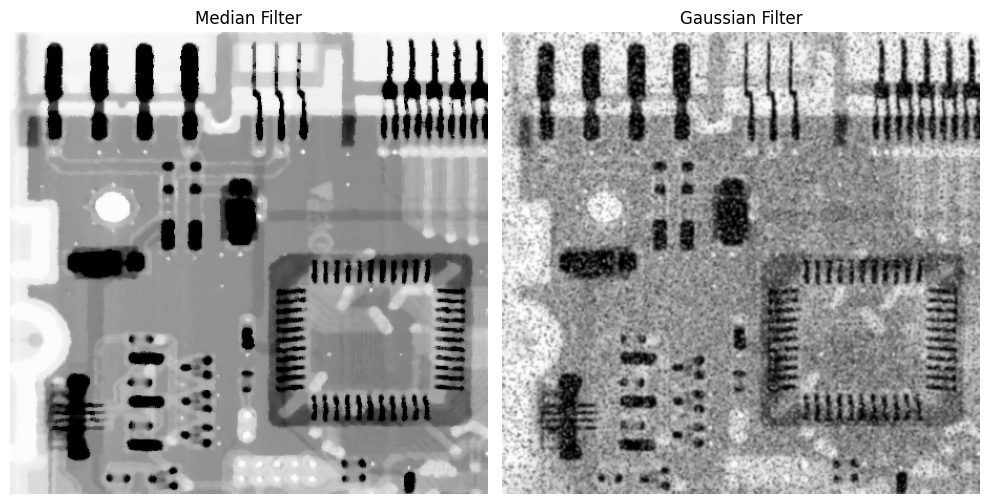

In [5]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi

image = cv2.imread('pcb.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error")
else:
    dale.figure(figsize=(6, 6))
    dale.imshow(image, cmap='gray')
    dale.title('Original Grayscale Image')
    dale.axis('off')
    dale.show()

    dale.figure(figsize=(6, 4))
    dale.hist(image.ravel(), bins=256, range=[0, 255], color='gray')
    dale.title('Image Histogram')
    dale.xlabel('Intensity Value')
    dale.ylabel('Pixel Count')
    dale.show()

    mean_val = cedi.mean(image)
    std_val = cedi.std(image)
    print(f"Image Mean Value: {mean_val:.2f}")
    print(f"Image Standard Deviation: {std_val:.2f}")

    denoised_median = cv2.medianBlur(image, 5)
    denoised_gaussian = cv2.GaussianBlur(image, (5, 5), 1.0)

    dale.figure(figsize=(10, 5))
    dale.subplot(1, 2, 1)
    dale.imshow(denoised_median, cmap='gray')
    dale.title('Median Filter')
    dale.axis('off')

    dale.subplot(1, 2, 2)
    dale.imshow(denoised_gaussian, cmap='gray')
    dale.title('Gaussian Filter')
    dale.axis('off')

    dale.tight_layout()
    dale.show()

I looked at the image and histogram. It looks like there is salt and pepper noise. Median filter worked better than Gaussian filter. I think median filter is better for this type of noise.

PROBLEM-6

In this task, I analyze and solve the visual problems in the image pollen.tif.

1. Load and display the image in grayscale.
2. Identify the visual issue using histogram and statistical analysis.
3. Apply two different image enhancement techniques to solve the problem.
4. Show the results side by side.
5. Justify and compare the solutions with visual and numerical evidence.

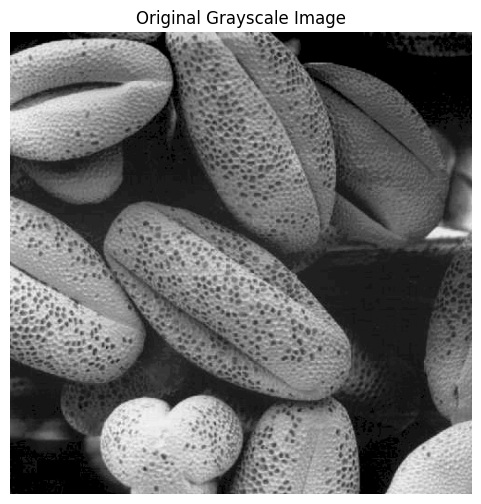

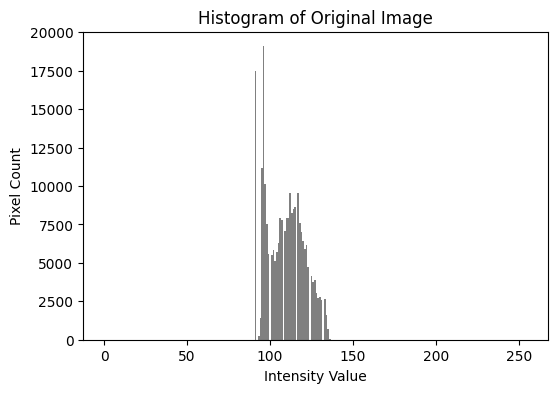

Mean Intensity: 109.08
Standard Deviation: 11.49


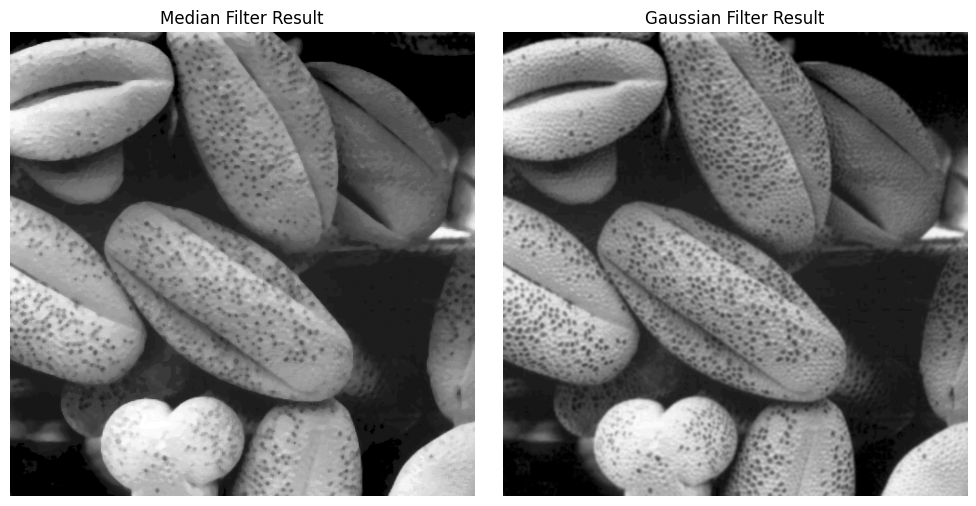

In [6]:
import cv2
import matplotlib.pyplot as dale
import numpy as cedi

image = cv2.imread('pollen.tif', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error")
else:
    dale.figure(figsize=(6, 6))
    dale.imshow(image, cmap='gray')
    dale.title('Original Grayscale Image')
    dale.axis('off')
    dale.show()

    dale.figure(figsize=(6, 4))
    dale.hist(image.ravel(), bins=256, range=[0, 255], color='gray')
    dale.title('Histogram of Original Image')
    dale.xlabel('Intensity Value')
    dale.ylabel('Pixel Count')
    dale.show()

    mean_val = cedi.mean(image)
    std_val = cedi.std(image)
    print(f"Mean Intensity: {mean_val:.2f}")
    print(f"Standard Deviation: {std_val:.2f}")

    denoised_median = cv2.medianBlur(image, 5)
    denoised_gaussian = cv2.GaussianBlur(image, (5, 5), 1.0)

    dale.figure(figsize=(10, 5))
    dale.subplot(1, 2, 1)
    dale.imshow(denoised_median, cmap='gray')
    dale.title('Median Filter Result')
    dale.axis('off')

    dale.subplot(1, 2, 2)
    dale.imshow(denoised_gaussian, cmap='gray')
    dale.title('Gaussian Filter Result')
    dale.axis('off')

    dale.tight_layout()
    dale.show()

I found the image was noisy and a bit blurry. The histogram showed low contrast. I used two filters. The median filter removed small noise points. The Gaussian filter made the image smoother. Both filters helped but the median filter worked better for small noises.